# Modeling Distributions

### Empirical distributions
Until now we are focus on data that based on real observation or __empirical__ observation. The distributions are so far __empirical distributions__ of data set which are necessarily __finite samples__.

### Analytic distributions

Another distribution is characterised by a __CDF__ that is a __mathematical function__. 

* Analytic distribution can be used to __model__ emirical distribution.
* A __Mode__ is a simplification or leaves out unneeded detail.
* Many __real world phenomena can be modeled with analytic distributions__.
* Analytic distributions are __abstractions__, which means they leave out details that are considered irrelevant.
* Analytic models are also a form of __data compression__. When a model fits a dataset well, a __small set of parameters can summarize a large amount of data_-.



This week presents common analytic distributions and uses them to model data from a variety of sources.


## The normal distribution

The normal distribution, also called __Gaussian__, is commonly used because it describes many natural processes or observations, at least approximately.

random cho

* The normal distribution is characterized by two parameters: 
    __the mean,$\mu$, and
    __standard deviation__ $\sigma$.
    
### Standard normal distribution
The normal distribution with µ = 0 and σ = 1

### The general form of its probability density function of normal distribution
Gaussian distribution is a type of continuous probability distribution for a __real-valued__random variable. The general form of its probability density function is


$$ f(x) = \frac{1}{\sigma \sqrt{2\pi}} e ^{-\frac{1}{2} \left( \frac{x-\mu}{\sigma} \right)^2} $$

CDF of normal distribution is hard to get solution from following close form:
$$  F(x) = \frac{1}{2\pi} -\int_\infty^x e ^{- \frac{t^2}{2}} dt
$$ 


summation sign

* Its CDF is defined by an integral thatdoes __not have a closed form solution__, but there are algorithms that evaluateit efficiently. 

* One of them is provided by SciPy: scipy.stats.norm is an object that represents a normal distribution; it provides a method, __cdf__, that __evaluates the standard normal CDF__:

data -> model -> predict the next data


if know mean and s.d. can predict anything real data by plug it in above formula

In [1]:
!pip install scipy

In [2]:
import scipy.stats
import thinkplot
import thinkstats2

In [3]:
print(scipy.stats.norm.cdf(0)) #at point 0 have density around 0.5

print(scipy.stats.norm.cdf(100))

print(scipy.stats.norm.cdf(1000))
print(scipy.stats.norm.cdf(10))
print(scipy.stats.norm.cdf(1))

0.5
1.0
1.0
1.0
0.8413447460685429


the median of the standard normal distribution is 0
(the same as the mean), and half of the values fall below the median, so
CDF(0) is 0.5

In [4]:
# Prepare for the Labs
from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/nsfg.py")

download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dct")
download(
    "https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dat.gz"
)

In [5]:
import nsfg

preg = nsfg.ReadFemPreg()

print(preg)
print(f'Number of whole records: {len(preg)}')

       caseid  pregordr  howpreg_n  howpreg_p  moscurrp  nowprgdk  pregend1  \
0           1         1        NaN        NaN       NaN       NaN       6.0   
1           1         2        NaN        NaN       NaN       NaN       6.0   
2           2         1        NaN        NaN       NaN       NaN       5.0   
3           2         2        NaN        NaN       NaN       NaN       6.0   
4           2         3        NaN        NaN       NaN       NaN       6.0   
...       ...       ...        ...        ...       ...       ...       ...   
13588   12571         1        NaN        NaN       NaN       NaN       6.0   
13589   12571         2        NaN        NaN       NaN       NaN       3.0   
13590   12571         3        NaN        NaN       NaN       NaN       3.0   
13591   12571         4        NaN        NaN       NaN       NaN       6.0   
13592   12571         5        NaN        NaN       NaN       NaN       6.0   

       pregend2  nbrnaliv  multbrth  ...  laborfor_

In [6]:
live = preg[preg.outcome == 1] ##live is already use in this line

print(f'Number of live records: {len(live)}')

Number of live records: 9148


__thinkstats2__ makes this function a little easier to use by providing
EvalNormalCdf, which takes parameters mu and sigma and evaluates the
CDF at x:


In [7]:
def EvalNormalCdf(x, mu=0, sigma=1):
    return scipy.stats.norm.cdf(x, loc=mu, scale=sigma)


Figure shows CDFs for normal distributions with a range of parameters.
The sigmoid shape of these curves is a recognizable characteristic of a normal
distribution.

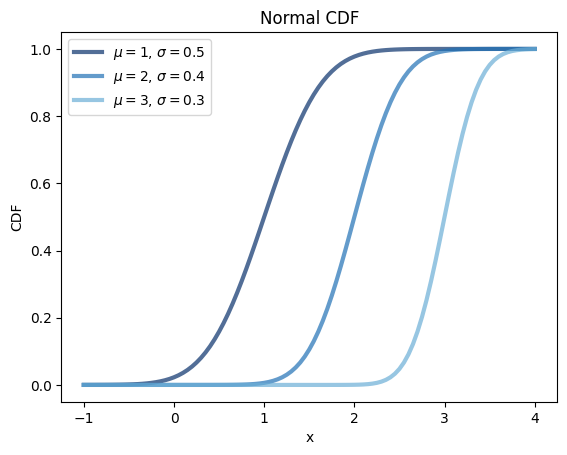

In [8]:
thinkplot.PrePlot(3)
##try to compare three normal distribution 
mus = [1.0, 2.0, 3.0]
sigmas = [0.5, 0.4, 0.3]
for mu, sigma in zip(mus, sigmas):
    xs, ps = thinkstats2.RenderNormalCdf(mu=mu, sigma=sigma, low=-1.0, high=4.0)
    label = r"$\mu=%g$, $\sigma=%g$" % (mu, sigma)
    thinkplot.Plot(xs, ps, label=label)

thinkplot.Config(title="Normal CDF", xlabel="x", ylabel="CDF", loc="upper left")

graphs parameter by mean and s.d.
accumulative 

### NSFG CDF



In [9]:
!pip install matplotlib
!pip install pandas
!pip install scipy
!pip install numpy

In [10]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [11]:



download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/nsfg.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/first.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dct")
download(
    "https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dat.gz"
)

Downloaded first.py


## Application of CDF to weight of babies

In [18]:
"birthord" in preg.columns

True

In [19]:
import thinkstats2
import thinkplot
firsts = live[live.birthord == 1]
others = live[live.birthord != 1]
first_cdf = thinkstats2.Cdf(firsts.totalwgt_lb, label='first')
other_cdf = thinkstats2.Cdf(others.totalwgt_lb, label='other')


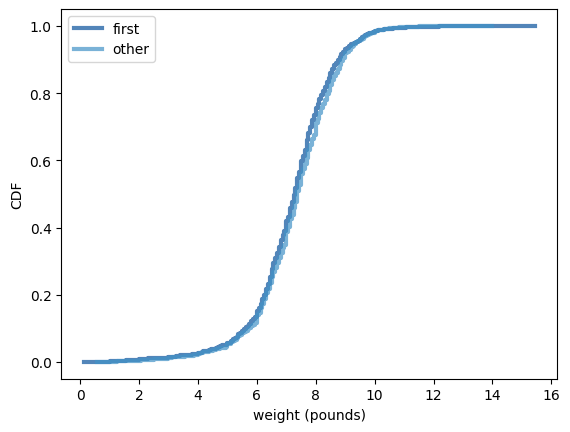

<Figure size 800x600 with 0 Axes>

In [21]:
thinkplot.PrePlot(2)
thinkplot.Cdfs([first_cdf, other_cdf])
thinkplot.Show(xlabel='weight (pounds)', ylabel='CDF')

##compute from the real dataset

### Data and Model 

We can look at the distribution of __birth weights__ in the
NSFG. Figure shows the __empirical CDF of weights__ for all live births and
the __CDF of a normal distribution__ with the same mean and variance.

In [27]:
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/first.py")
#download this to work with first babies

In [28]:
import nsfg
import first

In [29]:
firsts = live[live.birthord == 1]
others = live[live.birthord != 1]

In [30]:
preg = nsfg.ReadFemPreg() #Female pregnancy
weights = preg.totalwgt_lb.dropna()

Here's the observed CDF and the model. The model fits the data well except in the left tail.

Mean, Var 7.280883100022579 1.5452125703544892
Sigma 1.2430657948614343


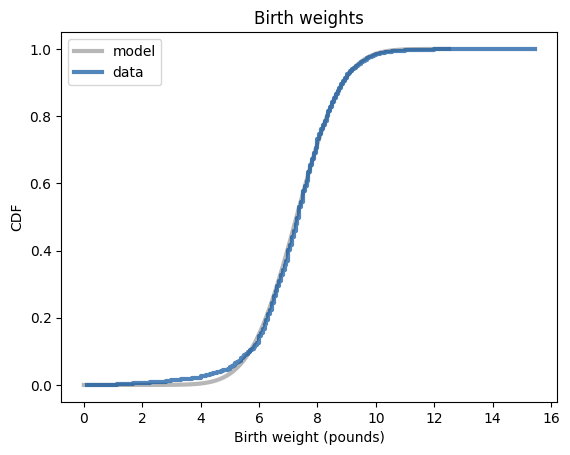

In [32]:
import numpy as np
# estimate parameters: trimming outliers yields a better fit
mu, var = thinkstats2.TrimmedMeanVar(weights, p=0.01) #this var mean variance and trimmed mean is the mean of the data after removing the outliers
print("Mean, Var", mu, var)

# plot the model
sigma = np.sqrt(var) ##sigma = s.d. => standard deviation = sqrt(variance which is var in this case)
print("Sigma", sigma)
xs, ps = thinkstats2.RenderNormalCdf(mu, sigma, low=0, high=12.5) #render the normal distribution which the knowledge of mu and sigma

#we don't use DATA anymore but we use the mu and sigma to plot the normal distribution
thinkplot.Plot(xs, ps, label="model", color="0.6")

# plot the data
cdf = thinkstats2.Cdf(weights, label="data")

thinkplot.PrePlot(1)
thinkplot.Cdf(cdf)
thinkplot.Config(title="Birth weights", xlabel="Birth weight (pounds)", ylabel="CDF")

##graph below is the normal distribution of the data which the knowledge of mu and variance and then we got sigma which is the standard deviation

#### Normal(7.28,1.24)

the normal distribution do not represent individual

The normal distribution is a good model for this dataset, so __if we summarize
the distribution with the parameters µ = 7.28 and σ = 1.24, the resulting
error (difference between the model and the data) is small__.

## Exponential Distribution
[https://www.probabilitycourse.com/chapter4/4_2_2_exponential.php]

* The exponential distribution is one of the widely used __continuous distributions__. It is often used to __model the time elapsed__ between events.

A continuous random variable $X$ is said to have an exponential distribution with parameter

 $\lambda >0 $

, shown as $X∼Exponential(\lambda)$,

 if its PDF,probality density function is given by

$$
   f_X(x) = \lambda e^{-\lambda x}
   
$$

 when $x$ > 0


 if know labda will know everything

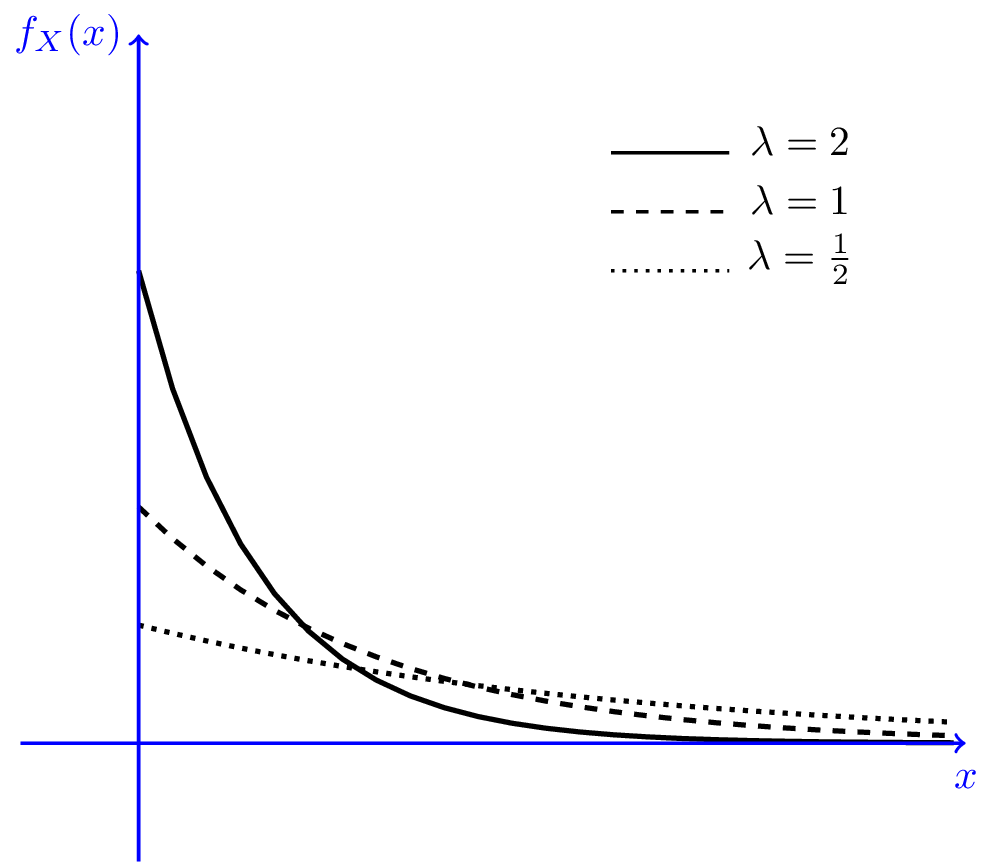

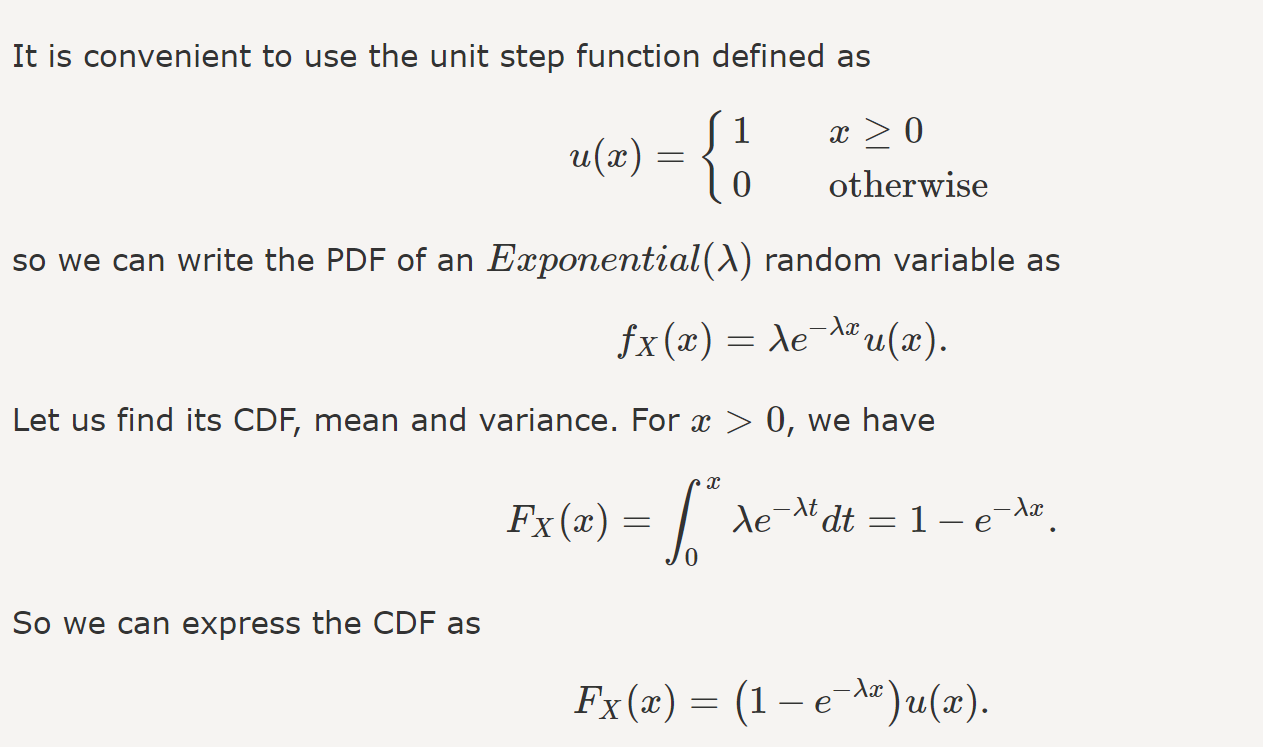

For short, The CDF of the exponential distribution is 

$$      CDF(x) = 1 -e^{-\lambda x}
$$

The parameter, λ, determines the shape of the distribution.

Here's what the exponential CDF looks like with a range of parameters.


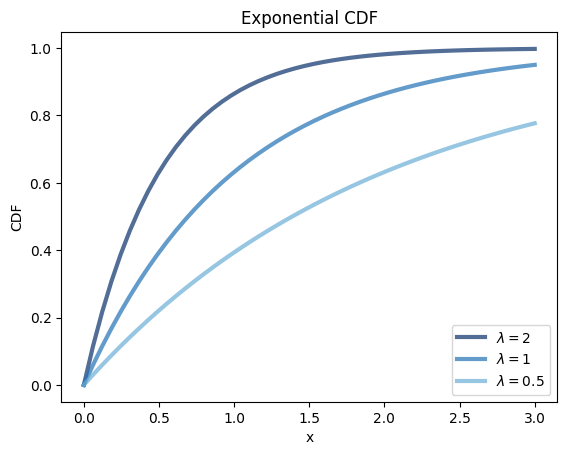

In [33]:
thinkplot.PrePlot(3)
for lam in [2.0, 1, 0.5]:
    xs, ps = thinkstats2.RenderExpoCdf(lam, 0, 3.0, 50)
    label = r"$\lambda=%g$" % lam
    thinkplot.Plot(xs, ps, label=label)

thinkplot.Config(title="Exponential CDF", xlabel="x", ylabel="CDF", loc="lower right")


* exponential distributions come up when we look at a __seriesof events__ and __measure the times between events__, called __interarrival times__

* If the __events are equally likely to occur at any time__, the __distribution of
interarrival times__ tends to look like an exponential distribution.




As an example, we will look at the interarrival time of births. On December
18, 1997, 44 babies were born in a hospital in Brisbane, Australia.1 The
time of birth for all 44 babies was reported in the local paper; the complete
dataset is in a file called babyboom.dat, in the ThinkStats2 repository

Here's the distribution of interarrival times from a dataset of birth times.

In [34]:
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/nsfg.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/analytic.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/babyboom.dat")

Downloaded analytic.py
Downloaded babyboom.dat


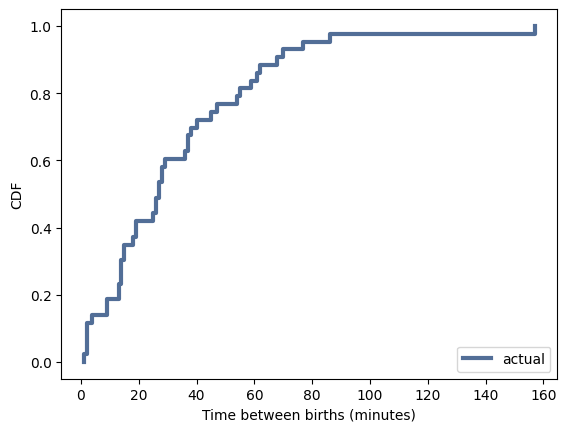

In [35]:
import analytic
import numpy as np

import thinkstats2
import thinkplot

#in this case we use 1 day

df = analytic.ReadBabyBoom()
diffs = df.minutes.diff()
cdf = thinkstats2.Cdf(diffs, label="actual") ##time different of real data 

thinkplot.Cdf(cdf)
thinkplot.Config(xlabel="Time between births (minutes)", ylabel="CDF")

- __ReadBabyBoom__ reads the data file and returns a DataFrame with columns
time, sex, weight_g, and minutes, 

- where __minutes__ is time of birth convertedto __minutes since midnight__

- diffs is the difference between consecutive birth times,
